## 08 Unsupervised Learning



## K-Means: Let's Consider Cereal
Let's consider some attributes of cereal, a longtime favourite North American breakfast item.  Are there similarities (perhaps common strategies) across different brands?

Cluster analysis is an unsupervised technique that allows us to find similarities in data.

In [ ]:
# import libraries
import sklearn
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, StandardScaler

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# mount drive if not already mounted
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Read in the cereal data file
cerealdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIDS-F207/Demos/08_Clustering_PCA/cereal2.csv')

In [ ]:
cerealdf.head()

,name,mfr,mfrcode,type,typecode,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,4,C,1,70.3,4.3,1.3,130.3,10.3,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,6,C,1,120.0,3.0,5.0,15.0,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,3,C,1,70.9,4.9,1.9,260.9,9.9,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,3,C,1,49.3,3.3,0.0,139.3,13.3,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,7,C,1,109.6,1.6,1.6,199.6,0.6,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
cerealdf.columns

Index(['name', 'mfr', 'mfrcode', 'type', 'typecode', 'calories', 'protein',
       'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins',
       'shelf', 'weight', 'cups', 'rating'],
      dtype='object')

In [ ]:
# Let's explore fiber and protein for clustering
df2 = cerealdf.loc[:,['fiber', 'protein']].copy()

In [ ]:
# Missing data checks
df2.isnull().sum()

,0
fiber,0
protein,0


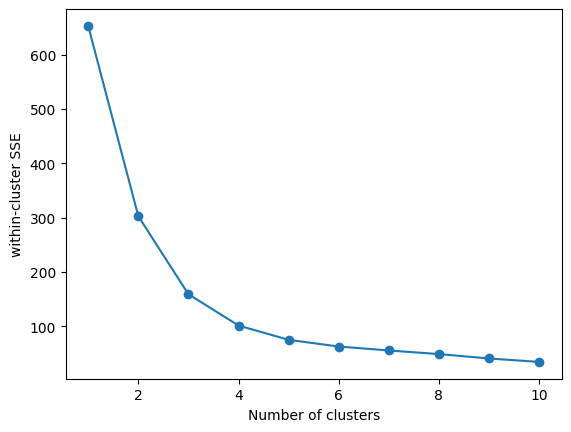

In [ ]:
# No missing data; let's continue.

# Elbow method:
# uses the within-cluster SSE to compare perforamnce of different clustering. Accessible via the intertia_ attribute after fitting a KMeans model.

# initialize within-cluster SSE list
wc_SSE = []

# fit KMeans models with different numbers of clusters
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                tol=1e-04,
                random_state=0)
    km.fit(df2)
    wc_SSE.append(km.inertia_)
# plot within-cluster SSE for each k
plt.plot(range(1,11), wc_SSE, marker='o');
plt.xlabel('Number of clusters');
plt.ylabel('within-cluster SSE');

In [ ]:
# Rememeber to scale! Cluster analysis requires us to scale the data to eliminate scaling effects in our results
scaler = StandardScaler()
scaler.fit(df2)
scaled = scaler.transform(df2)

In [ ]:
# Let's consider three clusters
# Fit K-Means
kmeans = KMeans(n_clusters = 3,
                init='k-means++',
                max_iter=300,
                n_init=10,
                tol=0.0001,
                random_state = 42)
kmeans = kmeans.fit(scaled) # use scaled data so all columns are on the same scale

In [ ]:
kmeans

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Get the unscaled coordinates of our centroids
unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
unscaled

array([[ 0.75869565,  1.37173913],
       [11.16666667,  4.16666667],
       [ 3.35714286,  3.79642857]])

In [ ]:
# Build a dataframe with the centroid coordinates
centroids = pd.DataFrame({'centroidx':unscaled[:,0],'centroidy':unscaled[:,1]})

In [ ]:
centroids.head()

,centroidx,centroidy
0,0.758696,1.371739
1,11.166667,4.166667
2,3.357143,3.796429


In [ ]:
# To make it easier to identify what cereal goes to what cluster
df2['label'] = kmeans.labels_.astype(int) # kmeans label_ generates the cluster numbers
df2.head() # see which cluster each row is assigned to

,fiber,protein,label
0,10.3,4.3,1
1,2.0,3.0,2
2,9.9,4.9,1
3,13.3,3.3,1
4,0.6,1.6,0


In [ ]:
# clusters are numbered 0, 1, 2
df2['mfr'] = cerealdf['mfr'] # Let's add the manufacturer to df2
df2['name'] = cerealdf['name'] # add the cereal name
df2['name'] = df2['name'].astype(str).str[0:6] # cut to six chars

df2.head()

,fiber,protein,label,mfr,name
0,10.3,4.3,1,N,100% B
1,2.0,3.0,2,Q,100% N
2,9.9,4.9,1,K,All-Br
3,13.3,3.3,1,K,All-Br
4,0.6,1.6,0,R,Almond


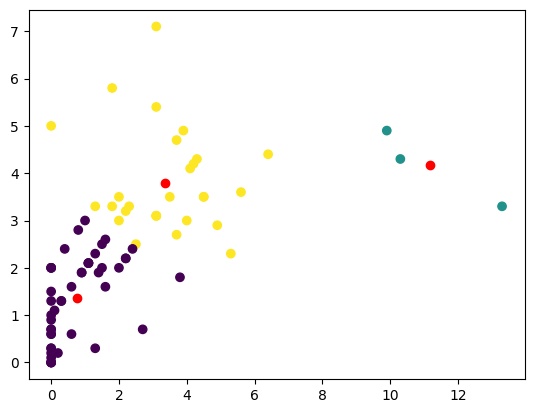

In [ ]:
# plot the results using the cluster number as the colour
# centroids appear in red
plt.scatter(df2['fiber'], df2['protein'], c=df2.label) # (x,y,colour)
plt.scatter(centroids['centroidx'], centroids['centroidy'], c='red') # (x,y,colour)

plt.show()

In [ ]:
df2['mfr'].value_counts()

,count
mfr,
K,23
G,22
P,9
Q,8
R,8
N,6
A,1


### NOTE:
* A = American Home Food Products
* G = General Mills
* K = Kelloggs
* N = Nabisco
* P = Post
* Q = Quaker Oats
* R = Ralston Purina

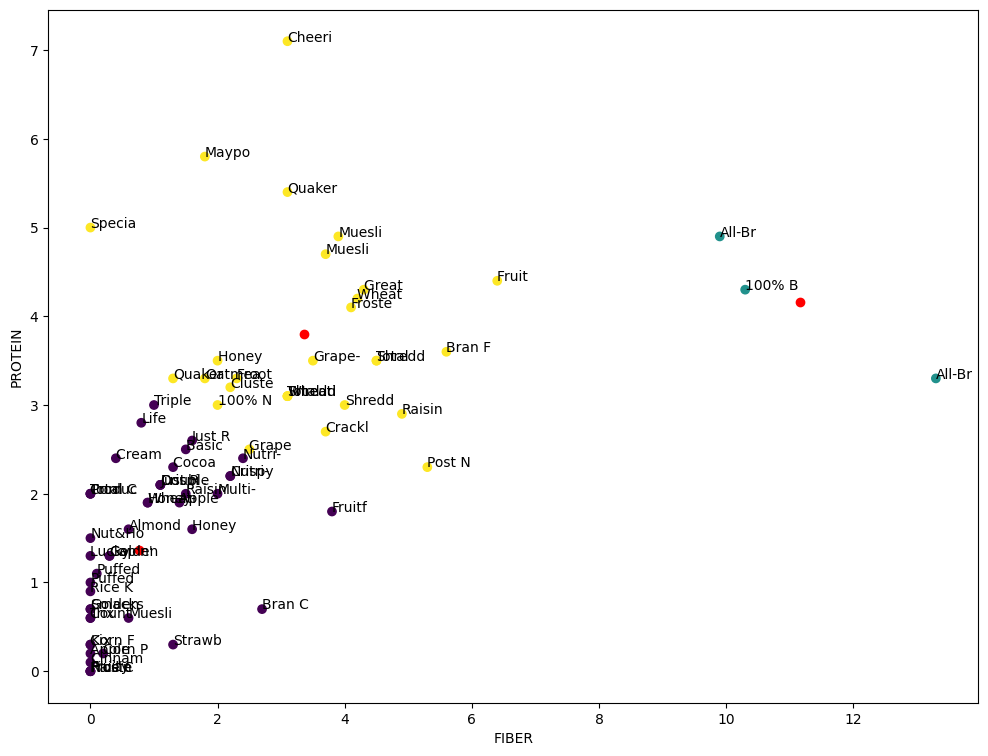

In [ ]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
fig, ax = plt.subplots()
plt.scatter(centroids['centroidx'], centroids['centroidy'], c='red') # (x,y,color)
plt.xlabel('FIBER')
plt.ylabel('PROTEIN')
ax.scatter(df2['fiber'], df2['protein'], c=df2.label)

for i, txt in enumerate(df2['name']):
    ax.annotate(txt, (df2['fiber'][i], df2['protein'][i]))
plt.show()

In [ ]:
# centroids

# Select only numeric columns for calculating the mean
numeric_cols = df2.select_dtypes(include=['number']).columns
df2.groupby('label')[numeric_cols].mean()

,fiber,protein,label
label,,,
0,0.758696,1.371739,0.0
1,11.166667,4.166667,1.0
2,3.357143,3.796429,2.0


### Note
* The elbow curve method is only a guide
* Fiber and protein were chosen arbitrarily as factors.  It is possible that other dimensions would provide different insights.
* BTW, our inability to visualize anything greater than three dimensions is part of the so called _curse of dimensionality_. It is very difficult for humans to think beyond two or three dimensions. Play around with the different features and see what you get.